In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# 2.2 Connectivity
In an orthogonal grid, sketch binary image objects that are
1. 4-adjacent,
2. 8-adjacent and
3. m-adjacent.
   
Specify the path lengths of the image objects.

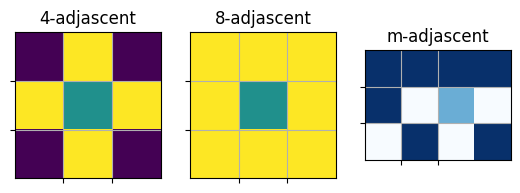

In [48]:
plt.subplot(1, 3, 1)
plt.imshow(np.array([0,1,0, 1,0.5,1, 0,1,0]).reshape(3,3))
plt.title("4-adjascent")
plt.xticks([0.5, 1.5], [])
plt.yticks([0.5, 1.5], [])
plt.grid(True)

plt.subplot(1, 3, 2)
plt.imshow(np.array([1,1,1, 1,0.5,1, 1,1,1]).reshape(3,3), vmin=0, vmax=1)
plt.title("8-adjascent")
plt.xticks([0.5, 1.5], [])
plt.yticks([0.5, 1.5], [])
plt.grid(True)


plt.subplot(1, 3, 3)
plt.imshow(np.array([1,1,1,1, 1,0,0.5,0, 0,1,0,1, ]).reshape(3,4), cmap='Blues')
plt.title("m-adjascent")
plt.xticks([0.5, 1.5], [])
plt.yticks([0.5, 1.5], [])
plt.grid(True)


# 2.3

Sketch a binary image object and state the following geometrical
properties:
1. Area
2. Contour length (different dimensions).

(100, 100)


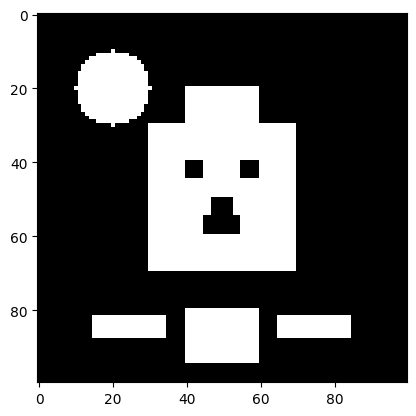

In [55]:
bin_img = np.zeros((100, 100), dtype=np.uint8)
# Draw a simple face using squares
# Head
bin_img[30:70, 30:70] = 1
# Ears
bin_img[20:30, 40:50] = 1
bin_img[20:30, 50:60] = 1
# Eyes
bin_img[40:45, 40:45] = 0
bin_img[40:45, 55:60] = 0
# Nose
bin_img[50:55, 47:53] = 0
# Mouth
bin_img[55:60, 45:55] = 0
# body
bin_img[80:95, 40:60] = 1
# arms
bin_img[82:88, 15:35] = 1
bin_img[82:88, 65:85] = 1

bin_img = cv2.circle(bin_img.copy(), (20,20), 10, 1, -1)

plt.imshow(bin_img, cmap='gray')

In [56]:
cnts, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cnts, len(cnts)

((array([[[65, 82]],
  
         [[65, 87]],
  
         [[84, 87]],
  
         [[84, 82]]], dtype=int32),
  array([[[15, 82]],
  
         [[15, 87]],
  
         [[34, 87]],
  
         [[34, 82]]], dtype=int32),
  array([[[40, 80]],
  
         [[40, 94]],
  
         [[59, 94]],
  
         [[59, 80]]], dtype=int32),
  array([[[40, 20]],
  
         [[40, 29]],
  
         [[39, 30]],
  
         [[30, 30]],
  
         [[30, 69]],
  
         [[69, 69]],
  
         [[69, 30]],
  
         [[60, 30]],
  
         [[59, 29]],
  
         [[59, 20]]], dtype=int32),
  array([[[20, 10]],
  
         [[19, 11]],
  
         [[16, 11]],
  
         [[15, 12]],
  
         [[14, 12]],
  
         [[12, 14]],
  
         [[12, 15]],
  
         [[11, 16]],
  
         [[11, 19]],
  
         [[10, 20]],
  
         [[11, 21]],
  
         [[11, 24]],
  
         [[12, 25]],
  
         [[12, 26]],
  
         [[14, 28]],
  
         [[15, 28]],
  
         [[16, 29]],
  
         [[19, 2

The area of the contour is 95.0
The perimeter of the contour is 48.0
-------
The area of the contour is 95.0
The perimeter of the contour is 48.0
-------
The area of the contour is 266.0
The perimeter of the contour is 66.0
-------
The area of the contour is 1712.0
The perimeter of the contour is 174.82842707633972
-------


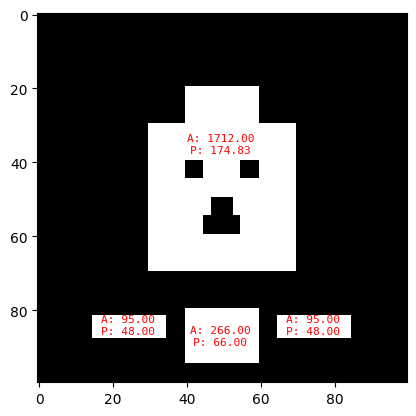

In [5]:
bin_img_clone = bin_img.copy()
plt.imshow(bin_img_clone, cmap='gray')
for cnt in cnts:
    print(f"The area of the contour is {cv2.contourArea(cnt)}")
    print(f"The perimeter of the contour is {cv2.arcLength(cnt, True)}\n-------")
    plt.text(*cnt.squeeze().mean(axis=0).astype(int), f"A: {cv2.contourArea(cnt):4.2f}\nP: {cv2.arcLength(cnt, True):4.2f}",
             color='red', va='center', ha='center', fontfamily='monospace', fontsize=8)


plt.show()

# 2.4 Euler number
Draw examples of binary pictures whose topological
properties are indicated by the corresponding Euler number E:
<ol type="a">
<li> E = 2 </li>
<li> E = 1 </li>
<li> E = 0 </li>
<li> E = -1 </li>
<li> E = -2 </li>
</ol>

1. What is the Euler number of the letters A, B, C and D ?
2. Draw the corresponding adjacency trees.

In [6]:
def find_holes(bin_img):
    cnts, _ = cv2.findContours(bin_img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
    tmp_img = np.zeros_like(bin_img)
    for x in range(tmp_img.shape[0]):
        for y in range(tmp_img.shape[1]):
            if bin_img[x, y] == 0 and any(cv2.pointPolygonTest(cnt, (y, x), False) >= 0 for cnt in cnts):
                tmp_img[x, y] = 255

    return cv2.findContours(tmp_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

def find_euler_number(img, verbose=False):
    h=len(find_holes(img))
    cc=len(cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0])
    if verbose:
        print(f"Number of connected components: {cc}")
        print(f"               Number of holes: {h}")
    return cc-h


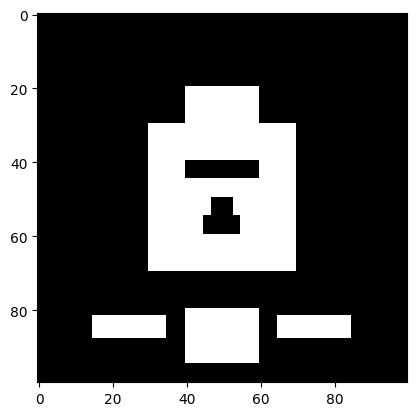

Number of connected components: 4
               Number of holes: 2
Euler number of the image is 2


In [7]:
# image with E = 2
bin_img_e2 = bin_img.copy()
bin_img_e2[40:45, 40:60] = 0

plt.imshow(bin_img_e2, cmap='gray')
plt.show()

print(f"Euler number of the image is {find_euler_number(bin_img_e2, verbose=True)}")

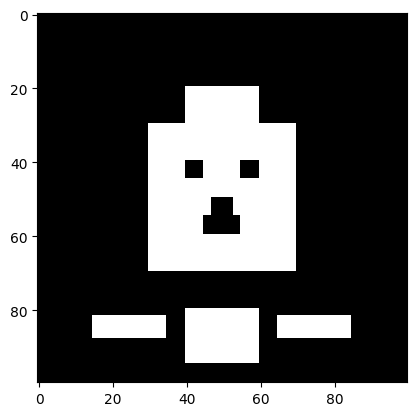

Number of connected components: 4
               Number of holes: 3
Euler number of the image is 1


In [8]:
# image with E = 1
bin_img_e1 = bin_img.copy()

plt.imshow(bin_img_e1, cmap='gray')
plt.show()

print(f"Euler number of the image is {find_euler_number(bin_img_e1, verbose=True)}")


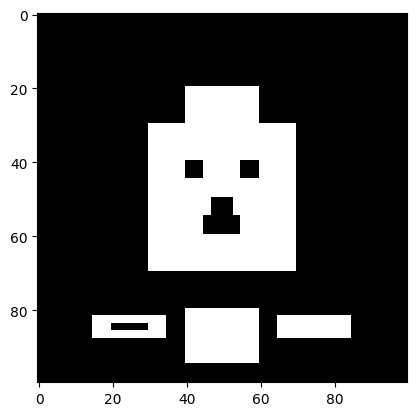

Number of connected components: 4
               Number of holes: 4
Euler number of the image is 0


In [9]:
# image with E = 0
bin_img_e0 = bin_img.copy()
bin_img_e0[84:86, 20:30] = 0

plt.imshow(bin_img_e0, cmap='gray')
plt.show()

print(f"Euler number of the image is {find_euler_number(bin_img_e0, verbose=True)}")

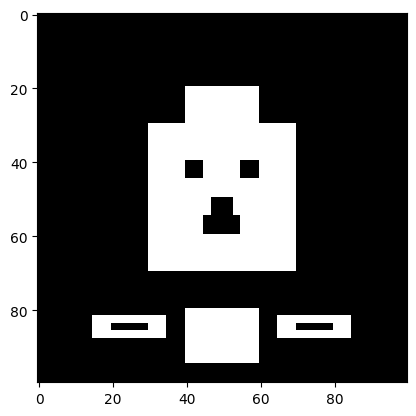

Number of connected components: 4
               Number of holes: 5
Euler number of the image is -1


In [10]:
# image with E = -1
bin_img_em1 = bin_img_e0.copy()
bin_img_em1[84:86, 70:80] = 0

plt.imshow(bin_img_em1, cmap='gray')
plt.show()

print(f"Euler number of the image is {find_euler_number(bin_img_em1, verbose=True)}")


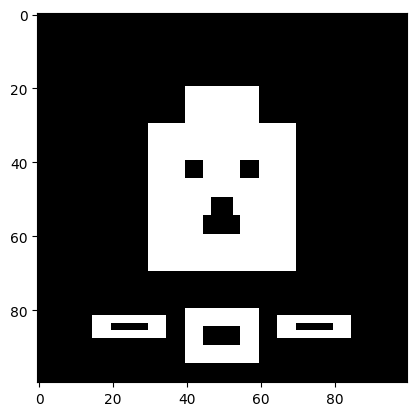

Number of connected components: 4
               Number of holes: 6
Euler number of the image is -2


In [11]:
# image with E = -2
bin_img_em2 = bin_img_em1.copy()
bin_img_em2[85:90, 45:55] = 0

plt.imshow(bin_img_em2, cmap='gray')
plt.show()

print(f"Euler number of the image is {find_euler_number(bin_img_em2, verbose=True)}")


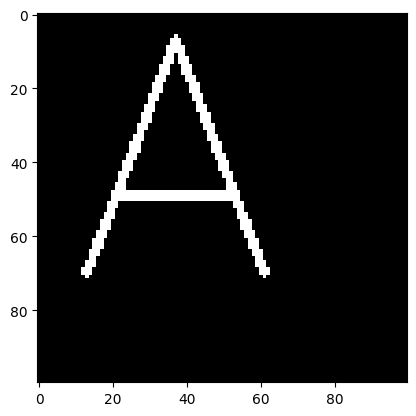

Number of connected components: 1
               Number of holes: 1
Euler number of the image is 0


In [12]:
# letter A img
letter_a = np.zeros((100, 100), dtype=np.uint8)
cv2.putText(letter_a, 'A', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, 255, 2)

plt.imshow(letter_a, cmap='gray')
plt.show()

print(f"Euler number of the image is {find_euler_number(letter_a, verbose=True)}")

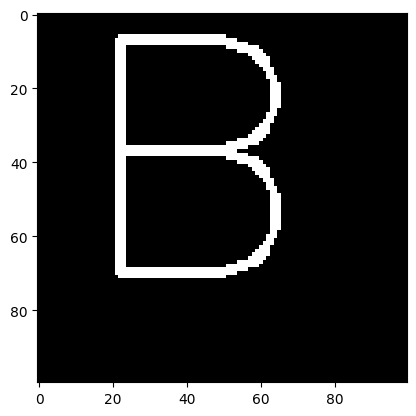

Number of connected components: 1
               Number of holes: 2
Euler number of the image is -1


In [13]:
# letter B img
letter_b = np.zeros((100, 100), dtype=np.uint8)
cv2.putText(letter_b, 'B', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, 255, 2)

plt.imshow(letter_b, cmap='gray')
plt.show()

print(f"Euler number of the image is {find_euler_number(letter_b, verbose=True)}")

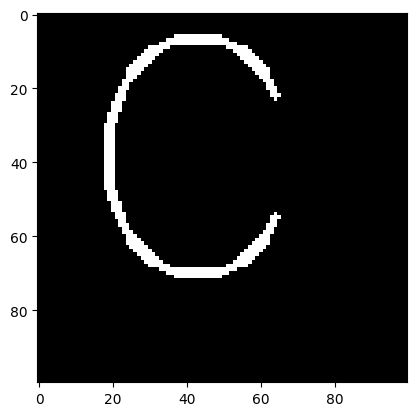

Number of connected components: 1
               Number of holes: 0
Euler number of the image is 1


In [14]:
# letter C img
letter_c = np.zeros((100, 100), dtype=np.uint8)
cv2.putText(letter_c, 'C', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, 255, 2)

plt.imshow(letter_c, cmap='gray')
plt.show()

print(f"Euler number of the image is {find_euler_number(letter_c, verbose=True)}")

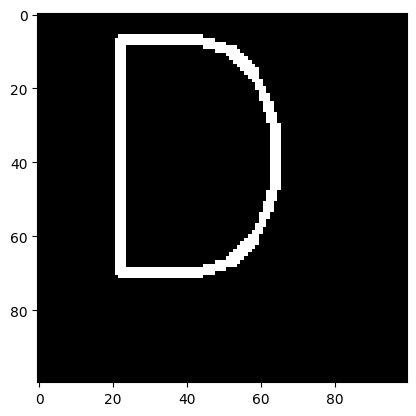

Number of connected components: 1
               Number of holes: 1
Euler number of the image is 0


In [15]:
# letter D img
letter_d = np.zeros((100, 100), dtype=np.uint8)
cv2.putText(letter_d, 'D', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, 255, 2)

plt.imshow(letter_d, cmap='gray')
plt.show()

print(f"Euler number of the image is {find_euler_number(letter_d, verbose=True)}")

# 2.6 Binarisation
Load an image (e.g. coins.png) and binarise the image so that the coins
characters appear as (black objects) on a white background in the binary
image.
Solve the binarization using “own” coding and using build in functions.

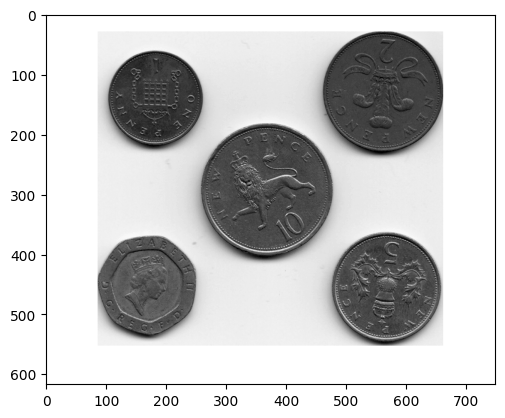

In [16]:
coins = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(coins, cmap='gray')
plt.show()

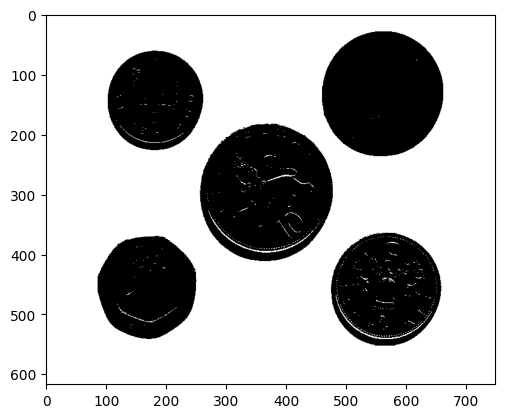

The calculated threshold is 172.0


In [17]:
# To use otsu thresholding, we have:
# > NOTE: the graythresh() function in matlab is using otsu thresholding (according to the [documentation](https://www.mathworks.com/help/images/ref/graythresh.html))


thresh, coins_bin = cv2.threshold(coins, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(coins_bin, cmap='gray')
plt.show()

print(f"The calculated threshold is {thresh}")

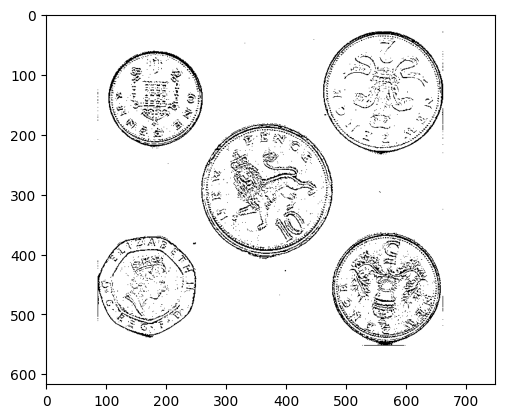

In [18]:
bw_coins = cv2.adaptiveThreshold(coins.copy(), 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 10)

plt.imshow(bw_coins, cmap='gray')
plt.show()

# 2.7 Threshold determination
Determine a suitable threshold value. You can use the histogram for this
purpose.
You can carry out the threshold determination automatically using build in
functions. Check the help (doc) which algorithm is used by the build in
function and how this algorithm works.
Think about how an own algorithm do to so could work? What are statistical
/ formal arguments supporting that your algorithm is reasonable?

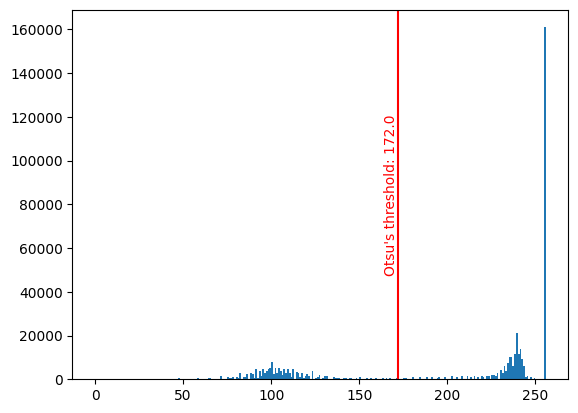

In [19]:
plt.hist(coins.ravel(), 256, [0, 256])
plt.axvline(thresh, color='red')
plt.text(thresh, 0.5*plt.ylim()[1], f"Otsu's threshold: {thresh}", color='red', va='center', ha='right', rotation=90)
plt.show()

In [42]:
from ipywidgets import interact

%matplotlib inline

coins_hist = np.histogram(coins.ravel(), 50, [0, 256], density=True)

@interact(lowerbound=(0, 255), upperbound=(0, 255))
def threshold(lowerbound, upperbound):
    _, coins_bin = cv2.threshold(coins, lowerbound, upperbound, cv2.THRESH_BINARY)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(coins_bin, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.bar(coins_hist[1][:-1], coins_hist[0], color='blue', label='Original histogram')
    plt.axvline(lowerbound, color='red')
    plt.axvline(upperbound, color='green')

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=127, description='lowerbound', max=255), IntSlider(value=127, descriptio…

# 2.9 Multi-Level Thresholding
Load the image circlesBrightDark.png and theshold it into
three classes. How is this possible?

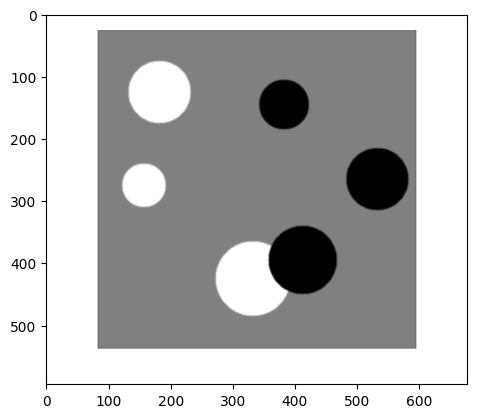

In [31]:
circles = cv2.imread('circlesBrightDark.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(circles, cmap='gray')
plt.show()

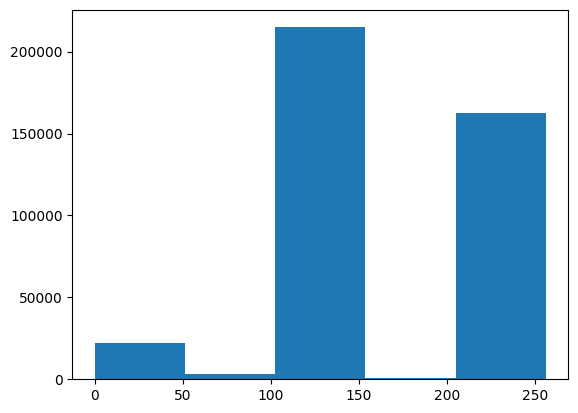

array([  0. ,  51.2, 102.4, 153.6, 204.8, 256. ])

In [47]:
bins, hist, _ = plt.hist(circles.ravel(), 5, [0, 256])
plt.show()
hist

In [ ]:
classes = np.zeros_like(circles)


# 2.11 Histogram Equalization 
Load the image hawkes_bay_raw.jpg provided in moodle. It has low
contrast. Implement an histogram equalization manually coding each needed step
without using build in high level functions. Compare your result with histeq().
Hint:
- Code a function to get the image statistics (histogram)
- Derive a suited LUT from the image statistics encoding a transfer
function that carries out a histogram equalization (hint: cf. definition
of CDF and PDF)
- Apply this LUT to the image

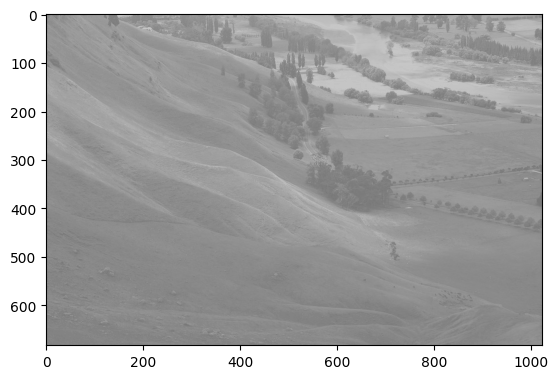

In [59]:
hawkey_img = cv2.imread('hawkes_bay_raw.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(hawkey_img, cmap='gray', vmin=0, vmax=255)
plt.show()

257 256
699392
[     0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      1      2     14     33     82    175
    395    883   1944   3691   5851   8569  11828  15867  20975  27370
  35833  46443  59973  76088  95213 117399 143095 171796 20012

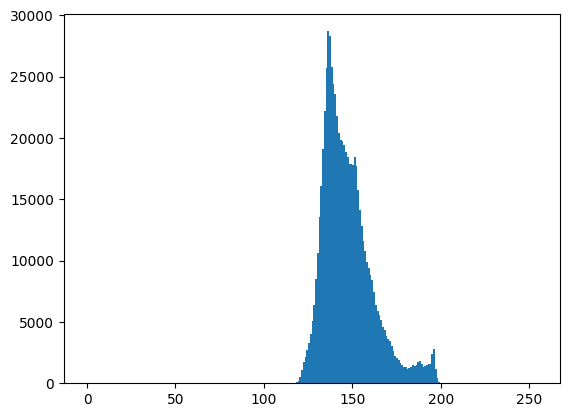

In [78]:
hist, bins = np.histogram(hawkey_img.ravel(), 256, [0, 255])
print(len(bins), len(hist))
print(np.sum(hist))
print(np.cumsum(hist))
plt.bar(bins[:-1], hist, width=1)
plt.show()

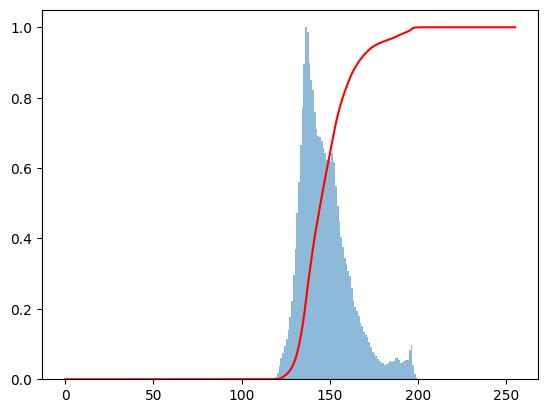

In [84]:
hist_cum = np.cumsum(hist)
hist_cum = hist_cum/hist_cum[-1]
plt.bar(bins[:-1], hist/np.max(hist), width=1, alpha=0.5)
plt.plot(hist_cum, color='red')
plt.show()